In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPool1D, Dropout, Activation

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

np.random.seed(42)

# load data

In [2]:
df_ori = pd.read_csv('BBB_planB_daily.csv')
df = df_ori.copy()

In [3]:
pd.set_option('display.max_columns', None)
df

T000_Act1  T000_Act10  T000_Act11  T000_Act12  T000_Act2  T000_Act3  \
0          12.0         0.0         0.0         0.0        0.0        0.0   
1           3.0         0.0         0.0         0.0        0.0        0.0   
2           0.0         0.0         0.0         0.0        1.0        3.0   
3         119.0         2.0         3.0         0.0        1.0       44.0   
4           7.0         0.0         0.0         0.0        0.0        2.0   
...         ...         ...         ...         ...        ...        ...   
5336        0.0         0.0         0.0         0.0        0.0        0.0   
5337       66.0         0.0         1.0         0.0       26.0        4.0   
5338        0.0         0.0         0.0         0.0        0.0        0.0   
5339        0.0         0.0         0.0         0.0        0.0        0.0   
5340        0.0         0.0         0.0         0.0        0.0        0.0   

      T000_Act4  T000_Act5  T000_Act6  T000_Act7  T000_Act8  T000_Act9  \
0           2.0        0.0        0.0        0.0        0.0        0.0   
1           2.0        0.0        0.0        0.0        0.0        0.0   
2           5.0        0.0        1.0        2.0        0.0        0.0   
3         103.0        0.0       35.0       25.0        0.0        0.0   
4           8.0        0.0        1.0        3.0        0.0        0.0   
...         ...        ...        ...        ...        ...        ...   
5336        0.0        0.0        0.0        0.0        0.0        0.0   
5337       33.0        0.0        8.0        1.0        0.0        0.0   
5338        0.0        0.0        0.0        0.0        0.0        0.0   
5339        0.0        0.0        0.0        0.0        0.0        0.0   
5340        0.0        0.0        0.0        0.0        0.0        0.0   

      T001_Act1  T001_Act10  T001_Act11  T001_Act12  T001_Act2  T001_Act3  \
0           0.0         0.0         0.0         0.0        0.0        0.0   
1           0.0         0.0         0.0         0.0        0.0        0.0   
2           0.0         0.0         0.0         0.0        0.0        0.0   
3          16.0         0.0         0.0         0.0        0.0        0.0   
4           4.0         0.0         0.0         0.0        0.0        3.0   
...         ...         ...         ...         ...        ...        ...   
5336        0.0         0.0         0.0         0.0        0.0        0.0   
5337        0.0         0.0         0.0         0.0        0.0        0.0   
5338        0.0         0.0         0.0         0.0        0.0        0.0   
5339        0.0         0.0         0.0         0.0        0.0        0.0   
5340        0.0         0.0         0.0         0.0        0.0        0.0   

      T001_Act4  T001_Act5  T001_Act6  T001_Act7  T001_Act8  T001_Act9  \
0           0.0        0.0        0.0        0.0        0.0        0.0   
1           0.0        0.0        0.0        0.0        0.0        0.0   
2           0.0        0.0        0.0        0.0        0.0        0.0   
3           3.0        0.0        0.0        0.0        0.0        0.0   
4           6.0        1.0        2.0        2.0        0.0        0.0   
...         ...        ...        ...        ...        ...        ...   
5336        0.0        0.0        0.0        0.0        0.0        0.0   
5337        0.0        0.0        0.0        0.0        0.0        0.0   
5338        0.0        0.0        0.0        0.0        0.0        0.0   
5339        0.0        0.0        0.0        0.0        0.0        0.0   
5340        0.0        0.0        0.0        0.0        0.0        0.0   

      T002_Act1  T002_Act10  T002_Act11  T002_Act12  T002_Act2  T002_Act3  \
0           7.0         0.0         0.0         0.0        0.0        0.0   
1           0.0         0.0         0.0         0.0        0.0        0.0   
2           3.0         0.0         0.0         0.0        1.0        1.0   
3          92.0         2.0         0.0         0.0        0.0        

# prepare X and y

In [4]:
X = df.drop(['final_result','id'], axis=1)
X

T000_Act1  T000_Act10  T000_Act11  T000_Act12  T000_Act2  T000_Act3  \
0          12.0         0.0         0.0         0.0        0.0        0.0   
1           3.0         0.0         0.0         0.0        0.0        0.0   
2           0.0         0.0         0.0         0.0        1.0        3.0   
3         119.0         2.0         3.0         0.0        1.0       44.0   
4           7.0         0.0         0.0         0.0        0.0        2.0   
...         ...         ...         ...         ...        ...        ...   
5336        0.0         0.0         0.0         0.0        0.0        0.0   
5337       66.0         0.0         1.0         0.0       26.0        4.0   
5338        0.0         0.0         0.0         0.0        0.0        0.0   
5339        0.0         0.0         0.0         0.0        0.0        0.0   
5340        0.0         0.0         0.0         0.0        0.0        0.0   

      T000_Act4  T000_Act5  T000_Act6  T000_Act7  T000_Act8  T000_Act9  \
0           2.0        0.0        0.0        0.0        0.0        0.0   
1           2.0        0.0        0.0        0.0        0.0        0.0   
2           5.0        0.0        1.0        2.0        0.0        0.0   
3         103.0        0.0       35.0       25.0        0.0        0.0   
4           8.0        0.0        1.0        3.0        0.0        0.0   
...         ...        ...        ...        ...        ...        ...   
5336        0.0        0.0        0.0        0.0        0.0        0.0   
5337       33.0        0.0        8.0        1.0        0.0        0.0   
5338        0.0        0.0        0.0        0.0        0.0        0.0   
5339        0.0        0.0        0.0        0.0        0.0        0.0   
5340        0.0        0.0        0.0        0.0        0.0        0.0   

      T001_Act1  T001_Act10  T001_Act11  T001_Act12  T001_Act2  T001_Act3  \
0           0.0         0.0         0.0         0.0        0.0        0.0   
1           0.0         0.0         0.0         0.0        0.0        0.0   
2           0.0         0.0         0.0         0.0        0.0        0.0   
3          16.0         0.0         0.0         0.0        0.0        0.0   
4           4.0         0.0         0.0         0.0        0.0        3.0   
...         ...         ...         ...         ...        ...        ...   
5336        0.0         0.0         0.0         0.0        0.0        0.0   
5337        0.0         0.0         0.0         0.0        0.0        0.0   
5338        0.0         0.0         0.0         0.0        0.0        0.0   
5339        0.0         0.0         0.0         0.0        0.0        0.0   
5340        0.0         0.0         0.0         0.0        0.0        0.0   

      T001_Act4  T001_Act5  T001_Act6  T001_Act7  T001_Act8  T001_Act9  \
0           0.0        0.0        0.0        0.0        0.0        0.0   
1           0.0        0.0        0.0        0.0        0.0        0.0   
2           0.0        0.0        0.0        0.0        0.0        0.0   
3           3.0        0.0        0.0        0.0        0.0        0.0   
4           6.0        1.0        2.0        2.0        0.0        0.0   
...         ...        ...        ...        ...        ...        ...   
5336        0.0        0.0        0.0        0.0        0.0        0.0   
5337        0.0        0.0        0.0        0.0        0.0        0.0   
5338        0.0        0.0        0.0        0.0        0.0        0.0   
5339        0.0        0.0        0.0        0.0        0.0        0.0   
5340        0.0        0.0        0.0        0.0        0.0        0.0   

      T002_Act1  T002_Act10  T002_Act11  T002_Act12  T002_Act2  T002_Act3  \
0           7.0         0.0         0.0         0.0        0.0        0.0   
1           0.0         0.0         0.0         0.0        0.0        0.0   
2           3.0         0.0         0.0         0.0        1.0        1.0   
3          92.0         2.0         0.0         0.0        0.0        

In [5]:
y = df['final_result']
y

0       0
1       1
2       0
3       1
4       1
       ..
5336    1
5337    1
5338    1
5339    0
5340    1
Name: final_result, Length: 5341, dtype: int64

In [6]:
# convert to numpy array
X = X.values
y = y.values

In [7]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
X_train1, X_test1, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(3738, 3228)
(1603, 3228)
(3738,)
(1603,)


In [10]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train1)
X_test = min_max_scaler.fit_transform(X_test1)

# build MLP model

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
X_train.shape[1:]

(3228,)

### --------------------------------------------------- set up learning rate---------------------------------------------------

In [13]:
##
lr=0.00001 
epochs=200

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=["accuracy"])

## loss: 0.7014 - accuracy: 0.8428 (lr=0.00001) (epochs=300)

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=["accuracy"])

##  loss: 0.4661 - accuracy: 0.8571 (lr=0.00001) (epochs=200)

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=["accuracy"])

## loss: 0.4068 - accuracy: 0.8752 (lr = 0.00001) (dropout=0.2) (epochs=100)  -->best

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=["accuracy"])

## loss: 0.4203 - accuracy: 0.8684 (lr = 0.00001) (dropout=0.3) (epochs=100)

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=["accuracy"])

## loss: 1.8957 - accuracy: 0.8303 (lr = 0.0001) (epochs=100)

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=["accuracy"])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               322900    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 40)                4040      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 326,981
Trainable params: 326,981
Non-trainable params: 0
_________________________________________________________________


# fit MLP model

In [15]:
history_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs)

Epoch 1/200
117/117 [==============================] - 1s 2ms/step - loss: 0.6864 - accuracy: 0.5629 - val_loss: 0.6764 - val_accuracy: 0.6650
Epoch 2/200
117/117 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.6544 - val_loss: 0.6613 - val_accuracy: 0.6949
Epoch 3/200
117/117 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6910 - val_loss: 0.6452 - val_accuracy: 0.7024
Epoch 4/200
117/117 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.6996 - val_loss: 0.6281 - val_accuracy: 0.7024
Epoch 5/200
117/117 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.7030 - val_loss: 0.6108 - val_accuracy: 0.7024
Epoch 6/200
117/117 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.7022 - val_loss: 0.5940 - val_accuracy: 0.7024
Epoch 7/200
117/117 [==============================] - 0s 2ms/step - loss: 0.6035 - accuracy: 0.7025 - val_loss: 0.5784 - val_accuracy: 0.7024

Epoch 58/200
117/117 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8764 - val_loss: 0.4315 - val_accuracy: 0.8503
Epoch 59/200
117/117 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8783 - val_loss: 0.4305 - val_accuracy: 0.8546
Epoch 60/200
117/117 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8780 - val_loss: 0.4293 - val_accuracy: 0.8571
Epoch 61/200
117/117 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8788 - val_loss: 0.4279 - val_accuracy: 0.8571
Epoch 62/200
117/117 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8823 - val_loss: 0.4270 - val_accuracy: 0.8596
Epoch 63/200
117/117 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8871 - val_loss: 0.4257 - val_accuracy: 0.8609
Epoch 64/200
117/117 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8836 - val_loss: 0.4248 - val_accuracy:

Epoch 115/200
117/117 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.9018 - val_loss: 0.4076 - val_accuracy: 0.8715
Epoch 116/200
117/117 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.9040 - val_loss: 0.4075 - val_accuracy: 0.8715
Epoch 117/200
117/117 [==============================] - 0s 2ms/step - loss: 0.2883 - accuracy: 0.9101 - val_loss: 0.4073 - val_accuracy: 0.8727
Epoch 118/200
117/117 [==============================] - 0s 2ms/step - loss: 0.2871 - accuracy: 0.9053 - val_loss: 0.4076 - val_accuracy: 0.8721
Epoch 119/200
117/117 [==============================] - 0s 2ms/step - loss: 0.2846 - accuracy: 0.9082 - val_loss: 0.4079 - val_accuracy: 0.8721
Epoch 120/200
117/117 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.9056 - val_loss: 0.4085 - val_accuracy: 0.8690
Epoch 121/200
117/117 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.9072 - val_loss: 0.4082 - val_ac

117/117 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9296 - val_loss: 0.4409 - val_accuracy: 0.8621
Epoch 172/200
117/117 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.9280 - val_loss: 0.4415 - val_accuracy: 0.8621
Epoch 173/200
117/117 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9275 - val_loss: 0.4427 - val_accuracy: 0.8621
Epoch 174/200
117/117 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9291 - val_loss: 0.4434 - val_accuracy: 0.8621
Epoch 175/200
117/117 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9302 - val_loss: 0.4451 - val_accuracy: 0.8621
Epoch 176/200
117/117 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9299 - val_loss: 0.4463 - val_accuracy: 0.8621
Epoch 177/200
117/117 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9302 - val_loss: 0.4476 - val_accuracy: 0.8621

In [16]:
history_model.params

{'verbose': 1, 'epochs': 200, 'steps': 117}

In [17]:
model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 618us/step - loss: 0.4772 - accuracy: 0.8553


[0.4772234261035919, 0.8552713394165039]

# plot MLP learning process

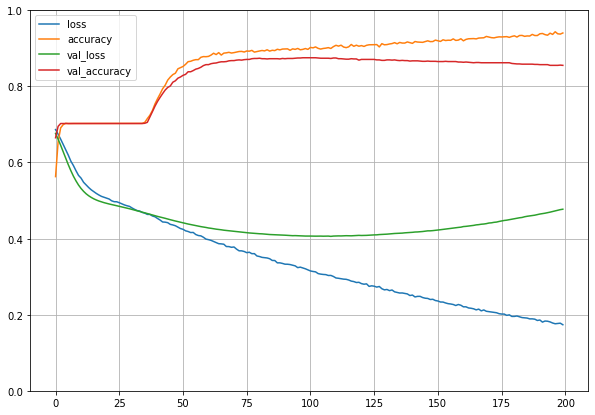

In [18]:
pd.DataFrame(history_model.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

another way to plot

def validation_training_process(history):
  plt.plot(history.history['loss'], label='Training Loss', color='green', linestyle = '--')
  plt.plot(history.history['val_loss'], label='Validation Loss', color='blue', linestyle ='--')
  plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
  plt.title('Training Process Visualization')

  plt.xlabel('No. epoch')
  plt.legend()
  plt.show()

validation_training_process(history_model)